In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squidpy as sq

In [ ]:
from run_analysis import runAnalysis

Start running
-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 9.5.0
appnope             0.1.3
asciitree           NA
asttokens           NA
backcall            0.2.0
cloudpickle         2.2.1
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dask                2023.5.1
dask_image          2023.03.0
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
docrep              0.3.2
entrypoints         0.4
executing           1.2.0
fasteners           0.18
h5py                3.8.0
igraph              0.10.4
imageio             2.31.0
ipykernel           6.23.1
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
lazy_loader         NA
leidenalg           0.9.1
llvmlite            0.40.0
matplotlib          3.7.1
matplotlib_scalebar 0.8.1
mpl_toolkits        NA
natsort             8.3.1
networkx            3.1
numba               0.57.0
numcodecs           0.11.0
numpy               1.24.3
packag

/Users/sharmam8/Documents/Spatial_Multiomics/.venv/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


None
AnnData object with n_obs × n_vars = 2786 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'
filtered out 508 cells that have less than 5000 counts
filtered out 1279 cells that have more than 35000 counts
#cells after MT filter: 999
filtered out 1796 genes that are detected in less than 10 cells
done filtering!
normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', bool

/Users/sharmam8/Documents/Spatial_Multiomics/.venv/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/sharmam8/Documents/Spatial_Multiomics/.venv/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/sharmam8/Documents/Spatial_Multiomics/.venv/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/sharmam8/Documents/Spatial_Mult

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)
done dimensionally reducing!


/Users/sharmam8/Documents/Spatial_Multiomics/.venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


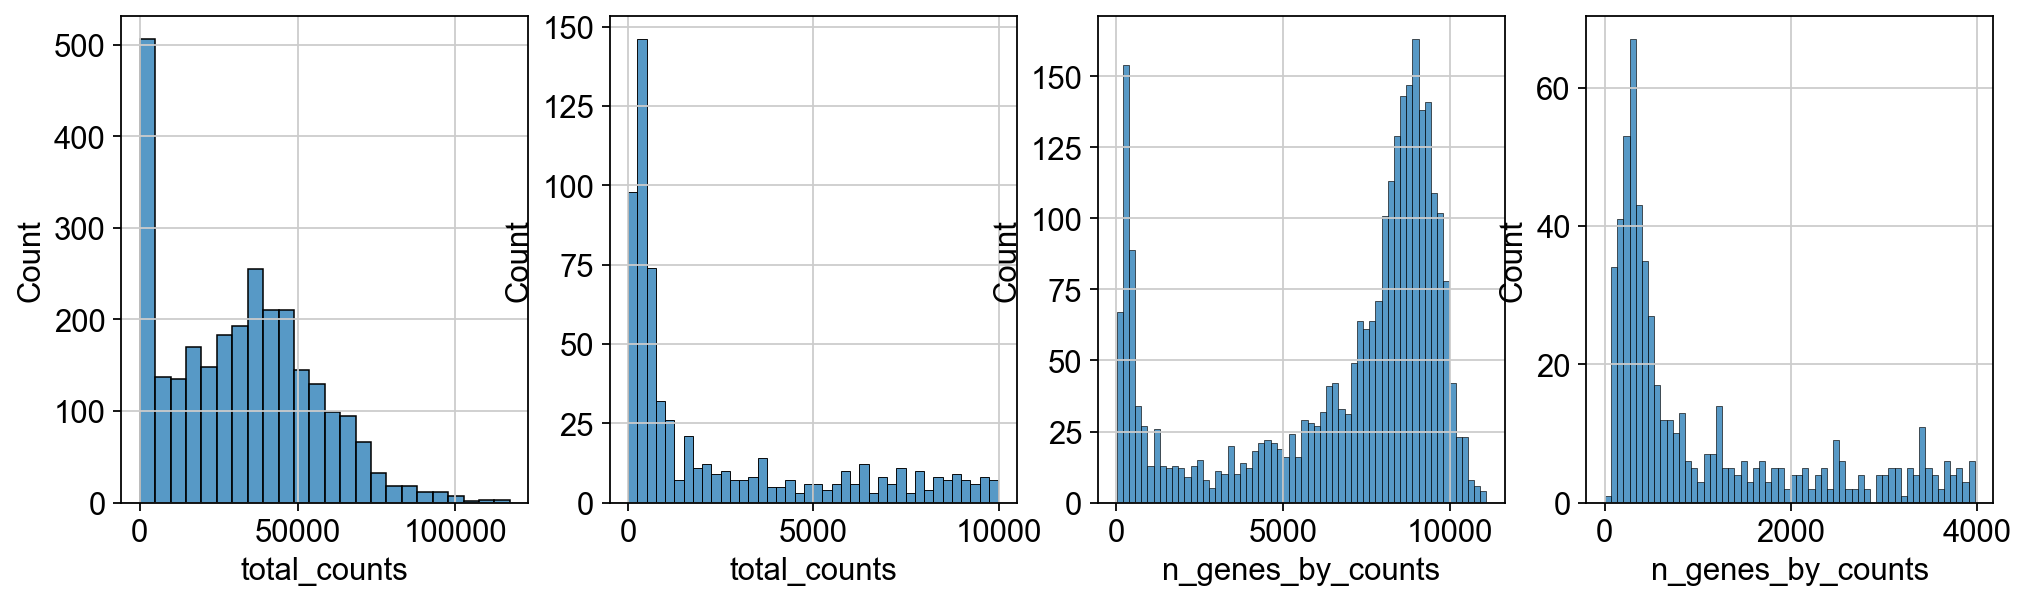

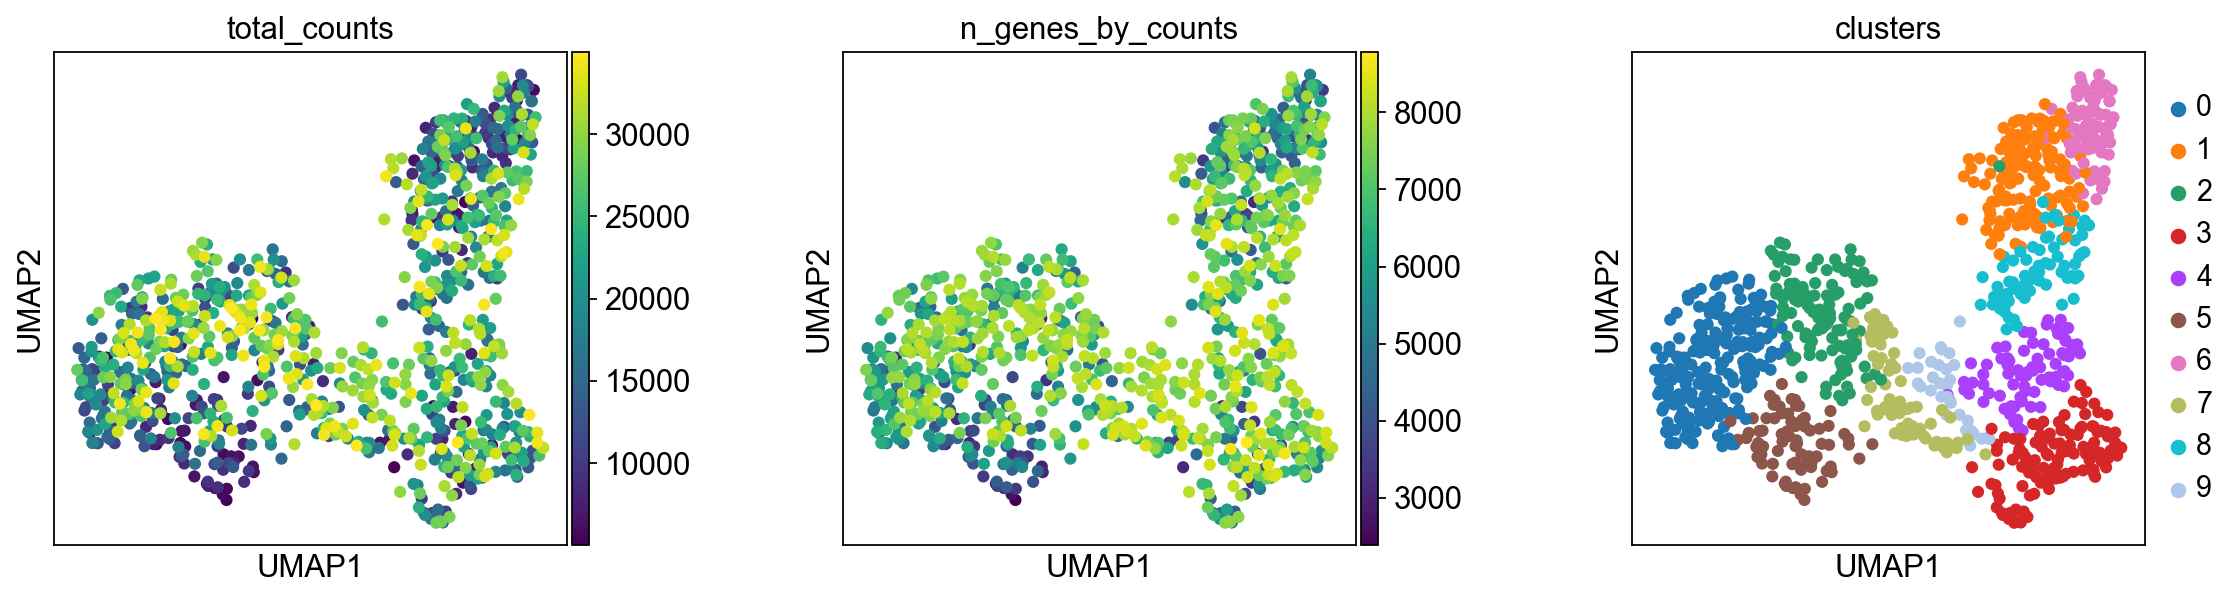

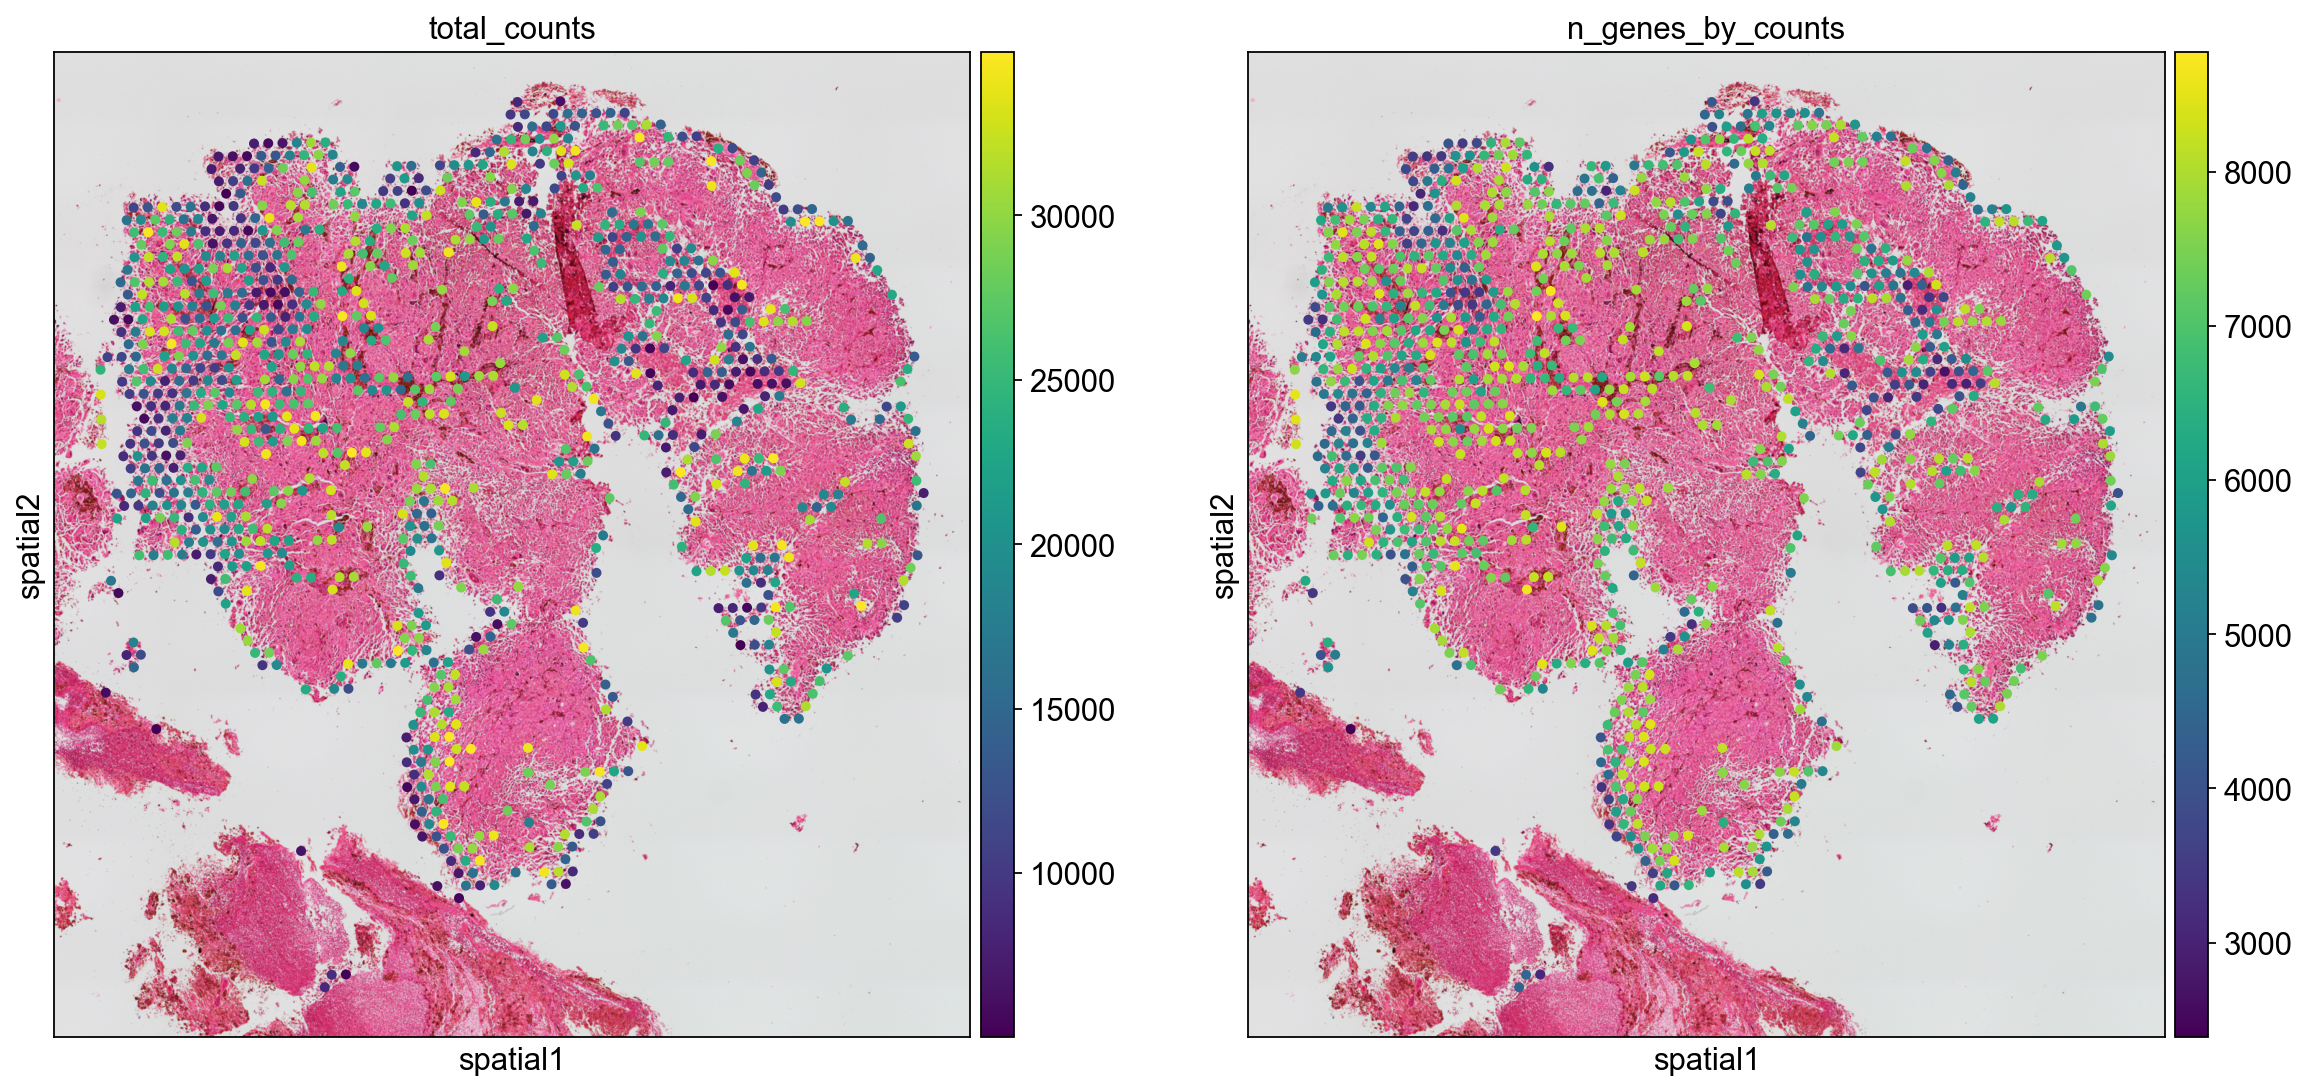

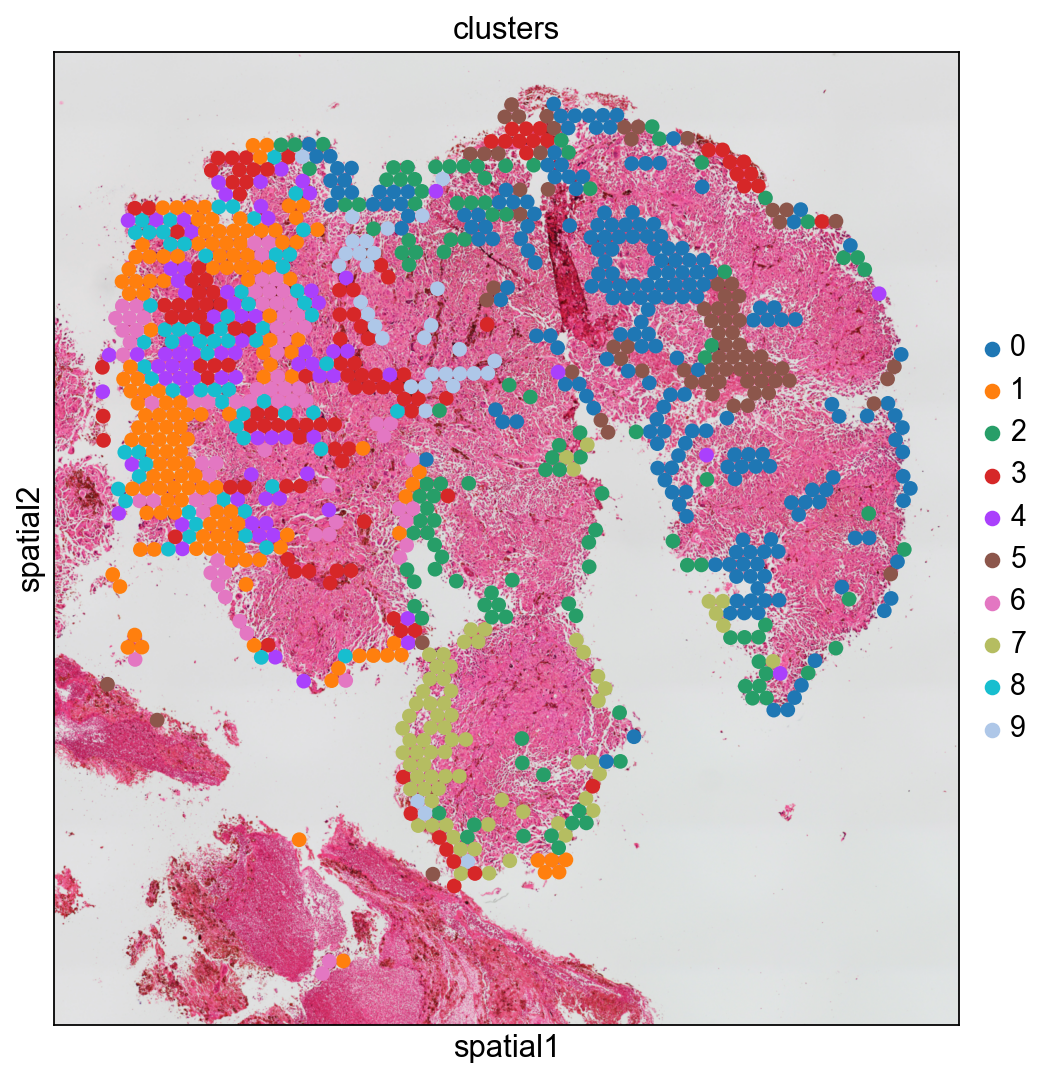

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters']`
categories: 0, 1, 2, etc.
var_group_labels: 0


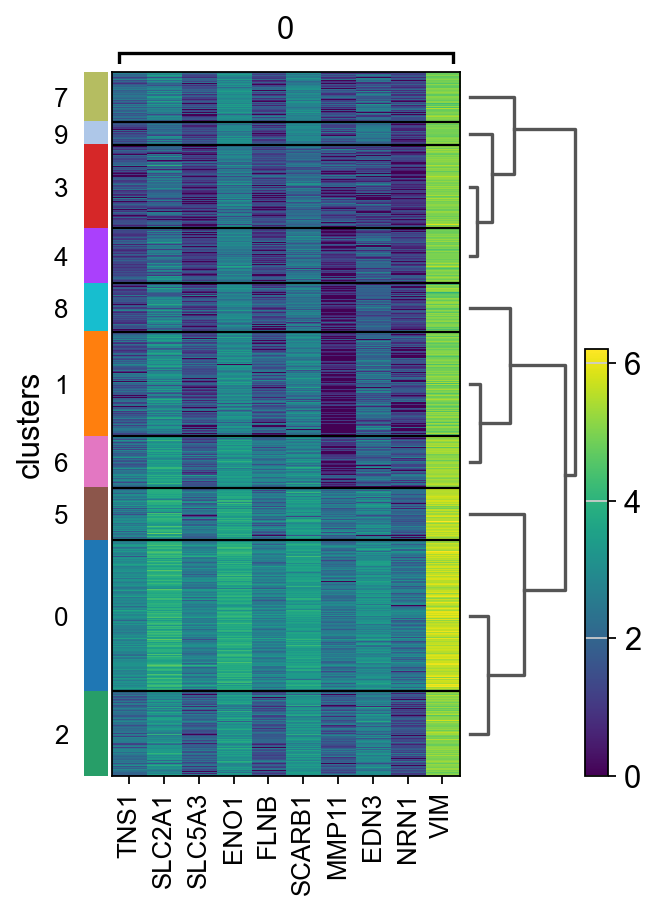

In [2]:
from run_analysis import runAnalysis
folder_name = "sample2/test/"
#create our first sample
p1 = runAnalysis()
mydata = p1.run()

In [3]:
genes = mydata[:, mydata.var.highly_variable].var_names.values[:100]
sq.gr.spatial_neighbors(mydata)
sq.gr.spatial_autocorr(
    mydata,
    mode="moran",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
mydata.uns["moranI"].head(10)

Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:02<00:00, 43.21/s]


Adding `adata.uns['moranI']`
Finish (0:00:02)


I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
SLC2A1  0.704130        0.0   0.00068         0.0  0.009901  0.000855   
C1QB    0.682868        0.0   0.00068         0.0  0.009901  0.000872   
C1QA    0.659138        0.0   0.00068         0.0  0.009901  0.000866   
C1QC    0.657473        0.0   0.00068         0.0  0.009901  0.000853   
FUCA1   0.601735        0.0   0.00068         0.0  0.009901  0.000660   
CCN1    0.561106        0.0   0.00068         0.0  0.009901  0.000694   
HES2    0.530673        0.0   0.00068         0.0  0.009901  0.000767   
LAPTM5  0.517793        0.0   0.00068         0.0  0.009901  0.000846   
PLPP3   0.470983        0.0   0.00068         0.0  0.009901  0.000647   
MXRA8   0.412299        0.0   0.00068         0.0  0.009901  0.000504   

        pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
SLC2A1               0.0                0.0          0.01737  
C1QB                 0.0                0.0          0.01737  
C1QA                 0.0                0.0          0.01737  
C1QC                 0.0                0.0          0.01737  
FUCA1                0.0                0.0          0.01737  
CCN1                 0.0                0.0          0.01737  
HES2                 0.0                0.0          0.01737  
LAPTM5               0.0                0.0          0.01737  
PLPP3                0.0                0.0          0.01737  
MXRA8                0.0                0.0          0.01737

In [6]:
genes = mydata[:, mydata.var.highly_variable].var_names.values[:100]
sq.gr.spatial_neighbors(mydata)
sq.gr.spatial_autocorr(
    mydata,
    mode="geary",
    genes=genes,
    n_perms=100,
    n_jobs=1,
)
mydata.uns["gearyC"].head(10)

Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating geary's statistic for `100` permutations using `1` core(s)


100%|██████████| 100/100 [00:02<00:00, 42.22/s]


Adding `adata.uns['gearyC']`
Finish (0:00:02)


C      pval_norm  var_norm     pval_z_sim  pval_sim   var_sim  \
SLC2A1  0.313761  6.523814e-153   0.00068  3.706453e-123  0.009901  0.000879   
C1QB    0.331984  5.081357e-145   0.00068  1.144911e-124  0.009901  0.000810   
C1QC    0.353439  5.318004e-136   0.00068  3.440731e-119  0.009901  0.000781   
C1QA    0.354057  9.573727e-136   0.00068  1.669905e-117  0.009901  0.000799   
FUCA1   0.430871  6.876761e-106   0.00068   3.005713e-95  0.009901  0.000812   
CCN1    0.453486   8.146192e-98   0.00068   8.468795e-83  0.009901  0.000832   
HES2    0.483172   1.033750e-87   0.00068   4.599069e-74  0.009901  0.000836   
LAPTM5  0.490429   2.505184e-85   0.00068   1.190574e-93  0.009901  0.000624   
PLPP3   0.536261   4.818303e-71   0.00068   2.791600e-83  0.009901  0.000576   
MXRA8   0.593236   3.766044e-55   0.00068   9.957228e-60  0.009901  0.000629   

        pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
SLC2A1     6.523814e-151      1.853226e-121          0.01768  
C1QB       2.540678e-143      1.144911e-122          0.01768  
C1QC       1.772668e-134      1.146910e-117          0.01768  
C1QA       2.393432e-134      4.174764e-116          0.01768  
FUCA1      1.375352e-104       6.011426e-94          0.01768  
CCN1        1.357699e-96       1.058599e-81          0.01768  
HES2        1.476786e-86       5.110076e-73          0.01768  
LAPTM5      3.131480e-84       1.984289e-92          0.01768  
PLPP3       5.353670e-70       3.987999e-82          0.01768  
MXRA8       3.766044e-54       9.052026e-59          0.01768

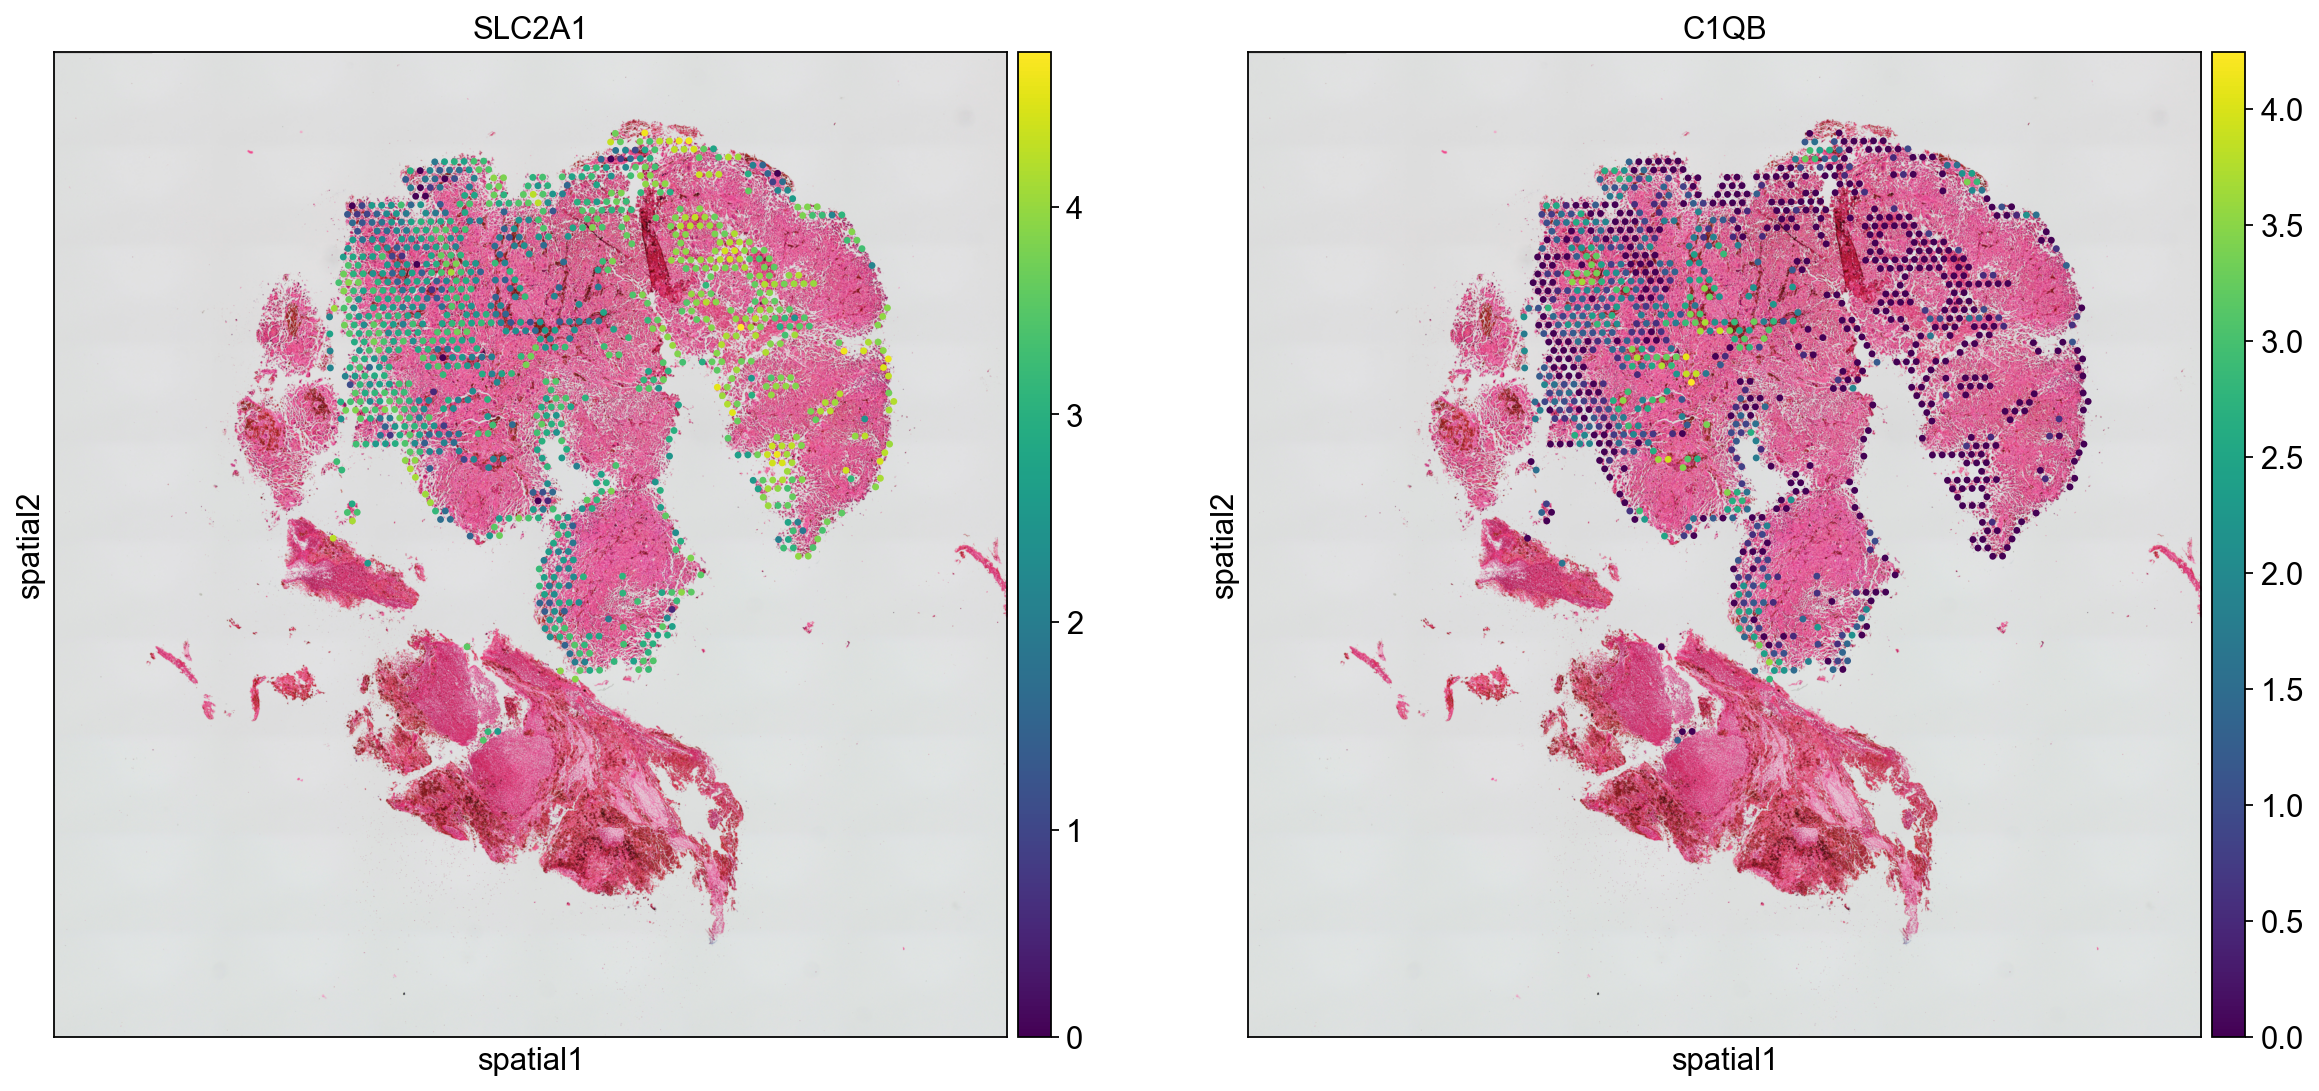

In [5]:
sq.pl.spatial_scatter(mydata, color=["SLC2A1", "C1QB"])

In [12]:
import scanpy as sc
import anndata as ad
import squidpy as sq

import numpy as np
import pandas as pd

In [ ]:
# load the pre-processed dataset
img = sq.datasets.visium_hne_image()